In [1]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Apple/dataset_lookback_60_labelwindow_5.csv")

In [23]:
df.head(20)

,Date,features,labels
0,1981-03-10,[0.09945 0.094261 0.087343 0.089504 0.092099 ...,Up
1,1981-03-11,[0.094261 0.087343 0.089504 0.092099 0.09772 ...,Up
2,1981-03-12,[0.087343 0.089504 0.092099 0.09772 0.102476 ...,Up
3,1981-03-13,[0.089504 0.092099 0.09772 0.102476 0.1068 ...,Up
4,1981-03-16,[0.092099 0.09772 0.102476 0.1068 0.112421 ...,Up
5,1981-03-17,[0.09772 0.102476 0.1068 0.112421 0.122799 ...,Up
6,1981-03-18,[0.102476 0.1068 0.112421 0.122799 0.124528 ...,Up
7,1981-03-19,[0.1068 0.112421 0.122799 0.124528 0.121502 ...,Up
8,1981-03-20,[0.112421 0.122799 0.124528 0.121502 0.118043 ...,Down
9,1981-03-23,[0.122799 0.124528 0.121502 0.118043 0.11934 ...,Down


In [4]:
df['labels'].value_counts()

Up      5051
Down    4480
Name: labels, dtype: int64

[0.111556 0.1068   0.104639 0.110259 0.109395 0.105503 0.105936 0.108098
 0.107233 0.113718 0.110259 0.112421 0.113718 0.113286 0.111556 0.110692
 0.107233 0.103342 0.09772  0.092099 0.095558 0.099017 0.099017 0.09945
 0.094261 0.094261 0.091235 0.090369 0.088207 0.090369 0.094261 0.08864
 0.083884 0.085181 0.082154 0.087343 0.08864  0.091667 0.092099 0.090802
 0.089937 0.089504 0.08864  0.081722 0.07783  0.074803 0.07783  0.076965
 0.079992 0.083884 0.089072 0.088207 0.089072 0.092532 0.092099 0.090369
 0.08864  0.085613 0.085613 0.084748]
0.00309848986879687


/Users/rohitgulve/opt/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


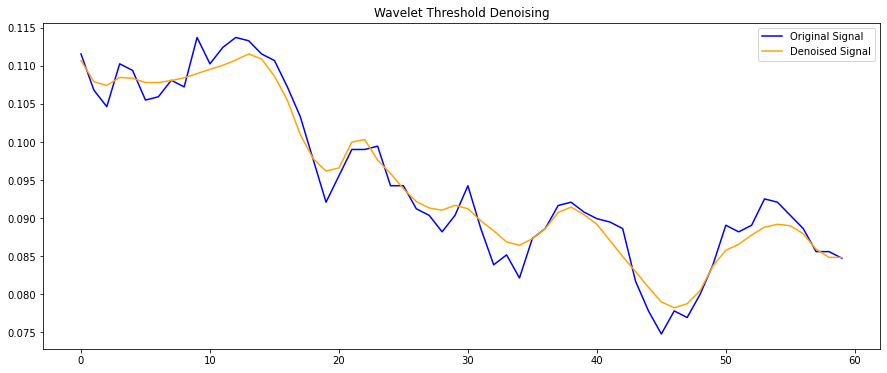

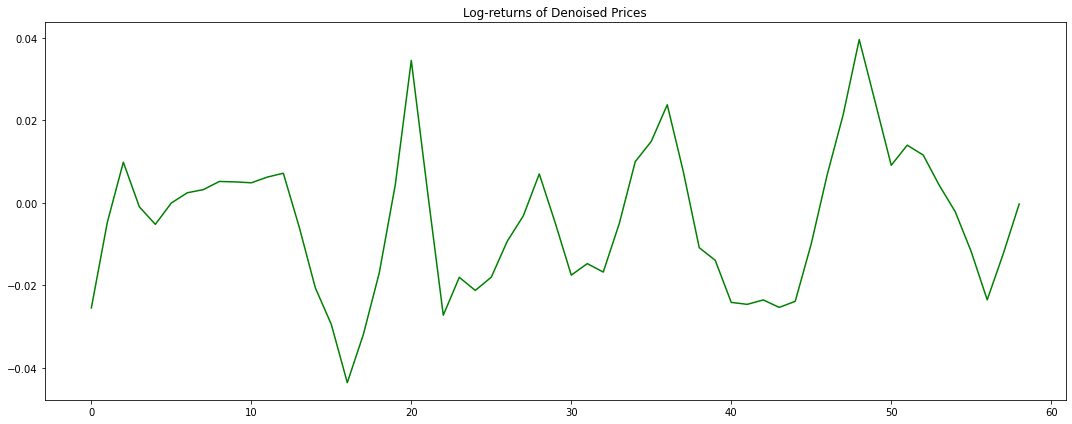

In [119]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Rigrsure threshold method
def rigrsure_thresh(data):
    n = len(data)
    sort_data = np.sort(np.abs(data))
    risk = np.zeros(n)
    for i in range(n):
        lambda_i = sort_data[i]
        term1 = (n - 2 * i) * lambda_i**2
        term2 = np.sum(sort_data[:i]**2)
        risk[i] = term1 + term2
    best_idx = np.argmin(risk)
    print(sort_data[best_idx])
    return sort_data[best_idx]

# Wavelet denoising
def wavelet_denoise(data, wavelet='db4', mode='soft', level=5):
    coeffs = pywt.wavedec(data, wavelet, level=level)
    threshold = rigrsure_thresh(coeffs[-1])
    coeffs[1:] = [pywt.threshold(c, threshold, mode=mode) for c in coeffs[1:]]
    return pywt.waverec(coeffs, wavelet)

# Simulate noisy data

data = df['features'][15].replace('[', '').replace(']', '').replace('\n', '').split()
data = [float(val) for val in data]

data = np.array(data)
print(data)

denoised_data = wavelet_denoise(data)

# Plot
plt.figure(figsize=(15, 6))
plt.plot(data, color='blue', label='Original Signal')
plt.plot(denoised_data, color='orange', label='Denoised Signal')
plt.legend()
plt.title("Wavelet Threshold Denoising")
plt.show()


# Calculate log-returns
plt.figure(figsize=(15, 6))
log_returns = np.diff(np.log(denoised_data))
plt.plot(log_returns, color='green')
plt.title('Log-returns of Denoised Prices')
plt.tight_layout()
plt.show()

[0.1068   0.112421 0.122799 0.124528 0.121502 0.118043 0.11934  0.116746
 0.111556 0.1068   0.104639 0.110259 0.109395 0.105503 0.105936 0.108098
 0.107233 0.113718 0.110259 0.112421 0.113718 0.113286 0.111556 0.110692
 0.107233 0.103342 0.09772  0.092099 0.095558 0.099017 0.099017 0.09945
 0.094261 0.094261 0.091235 0.090369 0.088207 0.090369 0.094261 0.08864
 0.083884 0.085181 0.082154 0.087343 0.08864  0.091667 0.092099 0.090802
 0.089937 0.089504 0.08864  0.081722 0.07783  0.074803 0.07783  0.076965
 0.079992 0.083884 0.089072 0.088207]
0.018878627566945954
0.011552940124887468
0.0032659049761957545


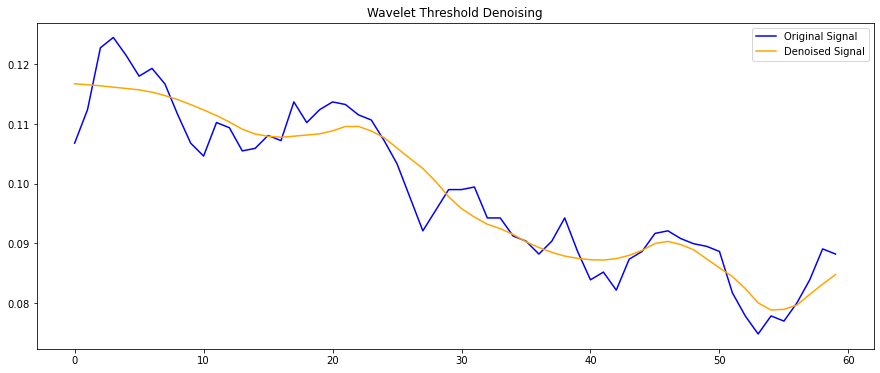

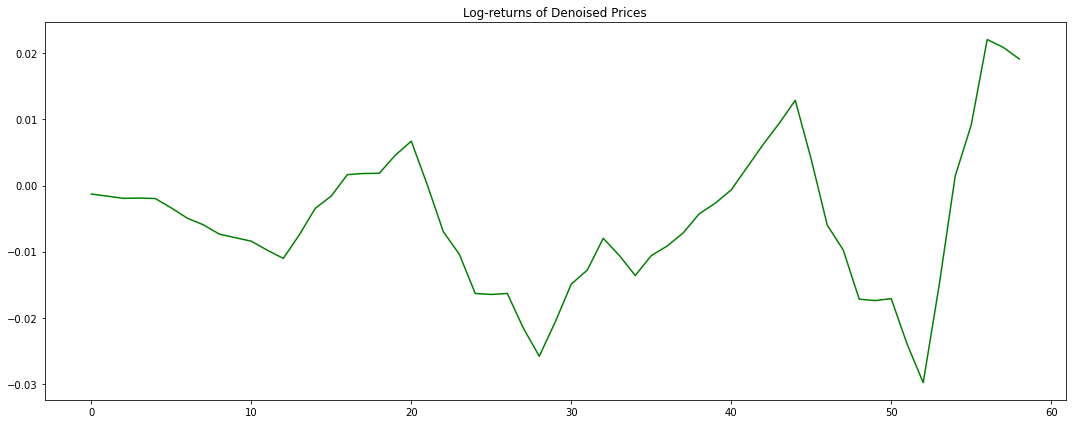

In [120]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Rigrsure threshold method
def rigrsure_thresh(X):
    n = np.size(X)
    a = np.sort(np.abs(X))**2
    c = np.linspace(n-1,0,n)
    s = np.cumsum(a)+c*a
    risk = (n - (2 * np.arange(n)) + s)/n
    ibest = np.argmin(risk)
    THR = np.sqrt(a[ibest])
    print(THR)
    return THR

# Wavelet denoising
def wavelet_denoise(data, wavelet='db4', mode='soft', level=3):
    coeffs = pywt.wavedec(data, wavelet, level=level)
    # Apply the threshold to each detail coefficient list in coeffs
    for i in range(1, len(coeffs)):
        threshold = rigrsure_thresh(coeffs[i])
        coeffs[i] = pywt.threshold(coeffs[i], threshold, mode=mode)
    return pywt.waverec(coeffs, wavelet)

# Simulate noisy data
data = df['features'][7].replace('[', '').replace(']', '').replace('\n', '').split()
data = [float(val) for val in data]
data = np.array(data)
print(data)

denoised_data = wavelet_denoise(data)

# Plot
plt.figure(figsize=(15, 6))
plt.plot(data, color='blue', label='Original Signal')
plt.plot(denoised_data, color='orange', label='Denoised Signal')
plt.legend()
plt.title("Wavelet Threshold Denoising")
plt.show()

# Calculate log-returns
plt.figure(figsize=(15, 6))
log_returns = np.diff(np.log(denoised_data))
plt.plot(log_returns, color='green')
plt.title('Log-returns of Denoised Prices')
plt.tight_layout()
plt.show()


In [36]:
# import numpy as np
# import pywt
# import matplotlib.pyplot as plt

# # Rigrsure threshold method
# def rigrsure_thresh(data):
#     n = len(data)
#     sort_data = np.sort(np.abs(data))
#     risk = np.zeros(n)
#     for i in range(n):
#         lambda_i = sort_data[i]
#         term1 = (n - 2 * i) * lambda_i**2
#         term2 = np.sum(sort_data[:i]**2)
#         risk[i] = term1 + term2
#     best_idx = np.argmin(risk)
#     return sort_data[best_idx]

# def wavelet_denoise(data, wavelet='db4', mode='soft'):
#     # Compute max level for decomposition
#     filter_len = int(wavelet[2:]) # Extracting the filter length from the wavelet name.
#     max_level = pywt.dwt_max_level(len(data), filter_len=filter_len)
    
#     coeffs = pywt.wavedec(data, wavelet, level=max_level)
    
#     # Apply Rigrsure thresholding on each detail coefficient
#     for i in range(1, len(coeffs)):
#         threshold = rigrsure_thresh(coeffs[i])
#         coeffs[i] = pywt.threshold(coeffs[i], threshold, mode=mode)
        
#     return pywt.waverec(coeffs, wavelet)

# # Simulate noisy data
# # Assuming you have a dataframe df loaded already
# data = df['features'][8].replace('[', '').replace(']', '').replace('\n', '').split()
# data = [float(val) for val in data]

# data = np.array(data)
# print(data)

# denoised_data = wavelet_denoise(data)

# # Plot
# plt.figure(figsize=(15, 6))
# plt.plot(data, color='blue', label='Original Signal')
# plt.plot(denoised_data, color='orange', label='Denoised Signal')
# plt.legend()
# plt.title("Wavelet Threshold Denoising")
# plt.show()

# # Calculate log-returns
# plt.figure(figsize=(15, 6))
# log_returns = np.diff(np.log(denoised_data))
# plt.plot(log_returns, color='green')
# plt.title('Log-returns of Denoised Prices')
# plt.tight_layout()
# plt.show()


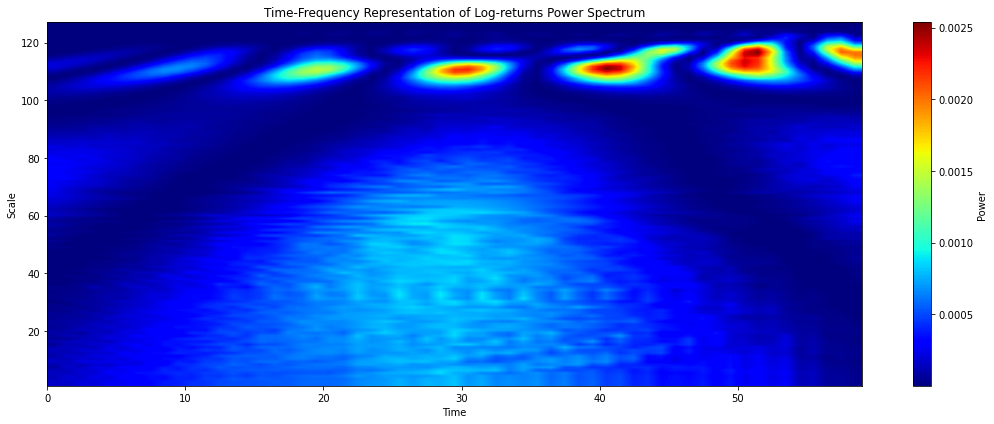

In [121]:
# Compute the continuous wavelet transform (CWT) using Morlet wavelet
widths = np.arange(1, 128)  # arbitrary range of scales
cwtmatr, _ = pywt.cwt(log_returns, widths, 'morl')

# Compute the power spectrum
power_spectrum = np.real(cwtmatr)**2

# Visualization
plt.figure(figsize=(15, 6))
plt.imshow(power_spectrum, aspect='auto', extent=[0, len(log_returns), 1, max(widths)], 
           cmap='jet', interpolation='bilinear')
plt.colorbar(label="Power")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title('Time-Frequency Representation of Log-returns Power Spectrum')
plt.tight_layout()
plt.show()

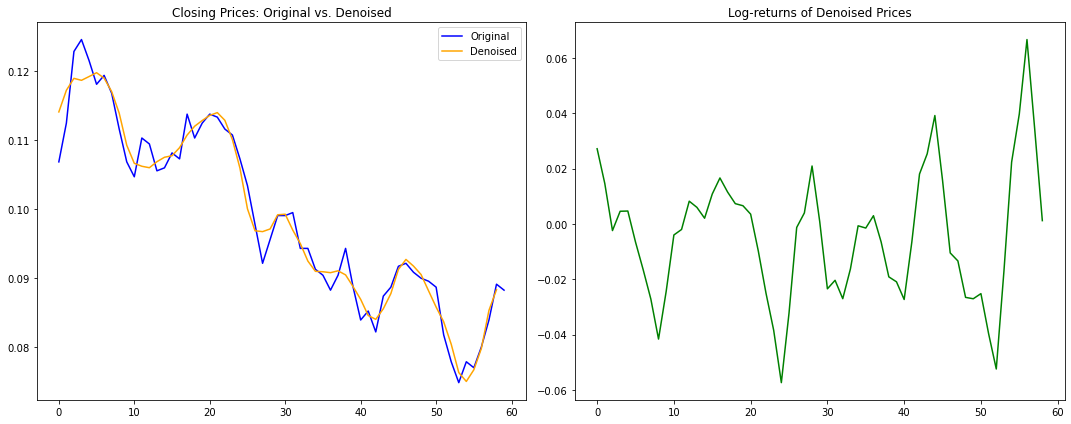

In [117]:
# Visualization
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(data, label="Original", color='blue')
plt.plot(denoised_data[:-1], label="Denoised", color='orange')
plt.legend()
plt.title('Closing Prices: Original vs. Denoised')

plt.subplot(1, 2, 2)
plt.plot(log_returns, color='green')
plt.title('Log-returns of Denoised Prices')
plt.tight_layout()
plt.show()

In [77]:
# widths = np.arange(1, 128)  # arbitrary range of scales
# cwtmatr, _ = pywt.cwt(log_returns, widths, 'cmor')

# # Compute the power spectrum
# power_spectrum = np.abs(cwtmatr)**2

# # Visualization
# plt.figure(figsize=(15, 6))
# plt.imshow(power_spectrum, aspect='auto', extent=[0, len(log_returns), 1, max(widths)], 
#            cmap='jet', interpolation='bilinear')
# plt.colorbar(label="Power")
# plt.ylabel("Scale")
# plt.xlabel("Days")
# plt.title('Time-Frequency Representation of Log-returns Power Spectrum')
# plt.tight_layout()
# plt.show()

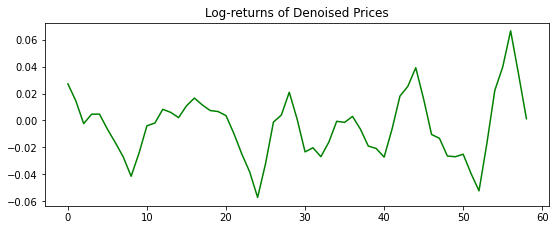

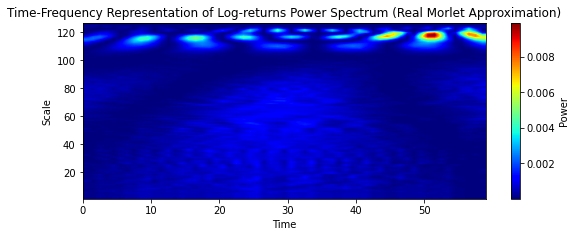

In [118]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Assuming you have your log_returns data already defined...

# Compute the continuous wavelet transform (CWT) using the complex Morlet wavelet
widths = np.arange(1, 128)  # arbitrary range of scales
cwtmatr, _ = pywt.cwt(log_returns, widths, 'morl')

# Consider only the real part of the transform as an approximation for the real Morlet wavelet
cwtmatr_real = np.real(cwtmatr)

# Compute the power spectrum
power_spectrum = cwtmatr_real**2

# Visualization
plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.plot(log_returns, color='green')
plt.title('Log-returns of Denoised Prices')
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 2)
plt.imshow(power_spectrum, aspect='auto', extent=[0, len(log_returns), 1, max(widths)], 
           cmap='jet', interpolation='bilinear')
plt.colorbar(label="Power")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title('Time-Frequency Representation of Log-returns Power Spectrum (Real Morlet Approximation)')
plt.tight_layout()
plt.show()
